# Image recognition of clothing


### Following tutorial below:

https://www.tensorflow.org/tutorials/keras/classification

In [1]:
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Fashion_Mnist Dataset:** 

60000 training images, 10000 test images each of 28x28 pixel grid. Labels are integer 0-9.

Data appears to be complete

**Preprocessing Data**

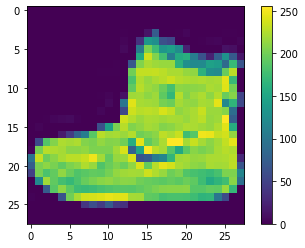

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
#Data is scaped from 0-255 (RGB values). Will need to rescale to 0 to 1.

train_images = train_images / 255
test_images = test_images / 255

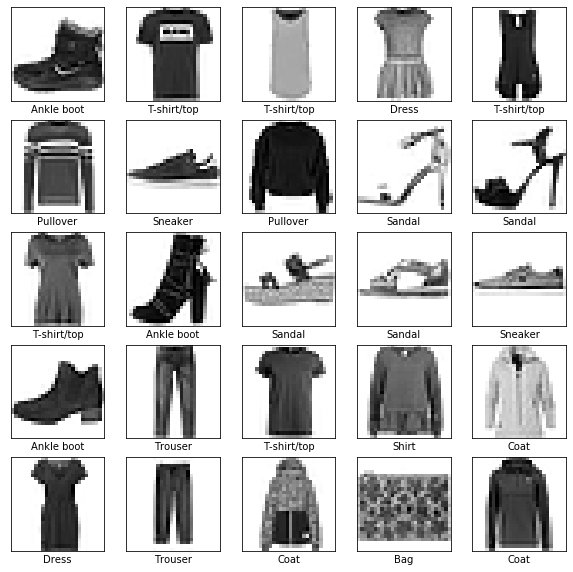

In [9]:
#Pull first 25 images from training dataset and 
#display labels to check for data quality

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**keras.layers.Dense**

output = activation(dot(input, kernel) + bias)
activation is element wise funtions
kernel is weights matrix created by layer
bias is bias vector created by layer

Used to reshape inputs

Rectified linear unit: 

https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

ReLU: 

* allows for sensativitly near limits vs prior use of sigmoidal or tanh functions (which drop off data near limits, causing nodes to "die" - vanishing gradient problem).

* linear for half the input domain, non linear for other half. Peicewise or hinge function

**return (max(0.0, x))**

|Input   |Ouput  |
|:-------|:------|
|1.0     |1.0    |
|1000.0  |1000.0 |
|1.0     |0.0    |
|-1.0    |0.0    |
|-1000   |0.0    |

In [10]:
#setup sequential layers for neural net

model = keras.Sequential([                        #in order
    keras.layers.Flatten(input_shape=(28,28)),    #28x828 grid to 784x1 dim
    keras.layers.Dense(128, activation='relu'),   #784x1 to 128x1
                                                  #REctified Linear Unit
                                                  #bias is 1.0 by default
    keras.layers.Dense(10)                        #return a 10x1 array
])

In [11]:
#additional settings for optimizer funtion, loss function, and metric

model.compile(optimizer = 'adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
#feed the model set of training data, 10 iterations through net

model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.5032 - accuracy: 0.8232
Epoch 2/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3768 - accuracy: 0.8643 - loss: 0.3782 - 
Epoch 3/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3379 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3140 - accuracy: 0.8839
Epoch 5/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2963 - accuracy: 0.8921
Epoch 6/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2809 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2685 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2595 - accuracy: 0.9042
Epoch 9/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2483 - accur

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3230 - accuracy: 0.8871

Test accuracy: 0.8871


Test accuracy is higher than training accuracy. Overfitting of model.

**TODO**: Investigate ways to reduce overfitting.

In [14]:
#apply the model as the first layer to the input, 
#then apply a softmax layer to convert to probability

probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])


In [15]:
#use prediction model to predict the label for test images
predictions = probability_model.predict(test_images)

In [16]:
#'confidence' of being in each category
predictions[0]

array([9.5822694e-10, 2.3082028e-11, 2.5996596e-12, 3.3126918e-11,
       2.3500285e-10, 1.1130351e-03, 2.5680398e-08, 4.3524220e-03,
       4.2465400e-09, 9.9453461e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [19]:
#setup a graph to look at full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

In [20]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

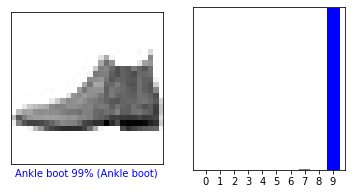

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

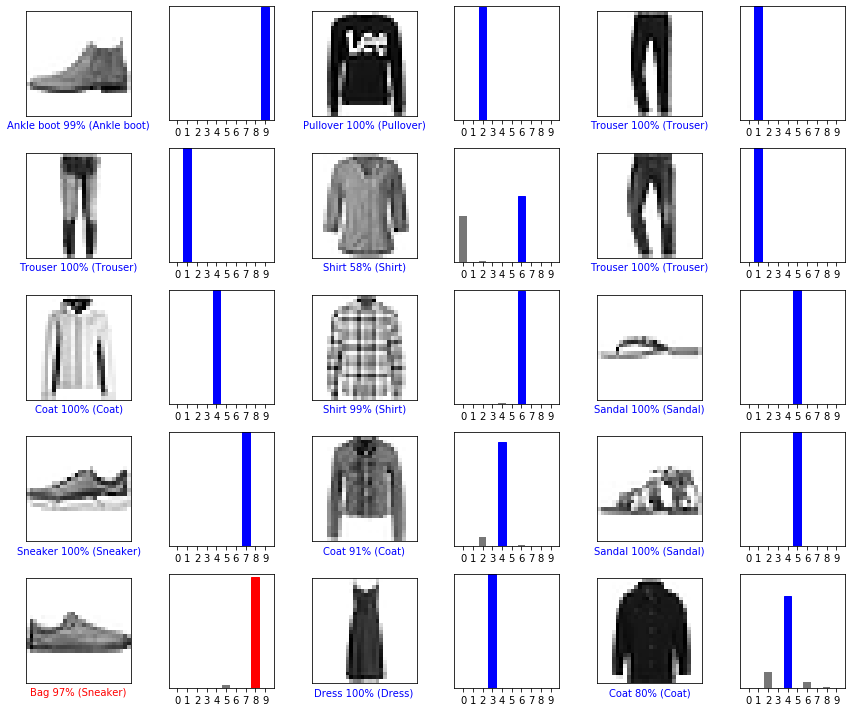

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### VS Support vector machine

Neural network appears to have worked pretty well, let's attempt vs a more traditional approach - SVM (linear and quadratic)

In [23]:
from sklearn.svm import LinearSVC

In [24]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
train_images_SVC = train_images.reshape(-1,784)
train_images_SVC = train_images_SVC / 255
test_images_SVC = test_images.reshape(-1, 784)
test_images_SVC = test_images_SVC / 255

train_images_SVC.shape, test_images_SVC.shape

((60000, 784), (10000, 784))

In [26]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [27]:
def displayimg(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show

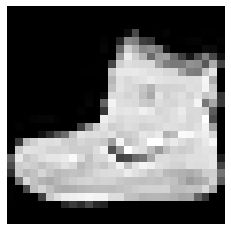

In [28]:
displayimg(train_images_SVC[0])

In [29]:
class_names[train_labels[0]]

'Ankle boot'

In [30]:
def fit_linear_classifier(C_value=1.0, max_iter=1000):
    clf = LinearSVC(C=C_value, loss = 'hinge')
    clf.fit(train_images_SVC, train_labels)
    
    linear_train_preds = clf.predict(train_images_SVC)
    linear_train_error = float(np.sum((linear_train_preds > 0.0) != (train_labels > 0.0)))/len(train_labels)
    
    linear_test_preds = clf.predict(test_images_SVC)
    linear_test_error = float(np.sum((linear_test_preds > 0.0) != (test_labels > 0.0)))/len(test_labels)
    
    return linear_train_error, linear_test_error

In [31]:
c_vals = np.geomspace(1e-2, 1e2, 5)

for c in c_vals:
    linear_train_error, linear_test_error = fit_linear_classifier(C_value=c)
    print ("Error rate for C = %2.0f (Linear): train %0.3f, test %0.3f" % (c, linear_train_error, linear_test_error))

Error rate for C =  0 (Linear): train 0.060, test 0.062


C:\Users\djord\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Error rate for C =  0 (Linear): train 0.061, test 0.062


C:\Users\djord\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Error rate for C =  1 (Linear): train 0.061, test 0.062


C:\Users\djord\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Error rate for C = 10 (Linear): train 0.051, test 0.053
Error rate for C = 100 (Linear): train 0.044, test 0.045


C:\Users\djord\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
from sklearn.svm import SVC

In [33]:
def fit_quadratic_classifier(c_value = 1.0):
    clf = SVC(C=c_value, kernel='poly', degree=2)
    clf.fit(train_images_SVC, train_labels)
    
    train_preds = clf.predict(train_images_SVC)
    train_error = float(np.sum((train_preds > 0.0) != (train_labels > 0.0)))/len(train_labels)
    
    test_preds = clf.predict(test_images_SVC)
    test_error = float(np.sum((test_preds > 0.0) != (test_labels > 0.0)))/len(test_labels)
    
    return train_error, test_error
    

In [34]:
quad_train_error, quad_test_error = fit_quadratic_classifier(1.0)
print("Error rate for C = %0.2f: train %0.3f, test %0.3f" % (1.0, quad_train_error, quad_test_error))

C:\Users\djord\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Error rate for C = 1.00: train 0.077, test 0.077
